<a href="https://colab.research.google.com/github/DarkSABBATH/AML_assignments/blob/main/assignment_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import (confusion_matrix, ConfusionMatrixDisplay, precision_score,
                             recall_score, f1_score, roc_curve, auc, RocCurveDisplay)

#  Load the dataset
data = pd.read_csv('/content/BrainCancer.csv')

In [7]:
# Features & target (edit columns as needed)
X = data.drop('status', axis=1)
y = data['status']  # Make sure 'status' is the binary label column

#  Train/Test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

# Train Decision Tree
clf = DecisionTreeClassifier(max_depth=4, random_state=42)
clf.fit(X_train, y_train)

# Predict
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:, 1]

In [8]:
#  Evaluation metrics
cm = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Confusion Matrix:\n", cm)
print(f"Precision: {precision:.2f}")
print(f"Recall:    {recall:.2f}")
print(f"F1-score:  {f1:.2f}")


Confusion Matrix:
 [[6 5]
 [3 4]]
Precision: 0.44
Recall:    0.57
F1-score:  0.50


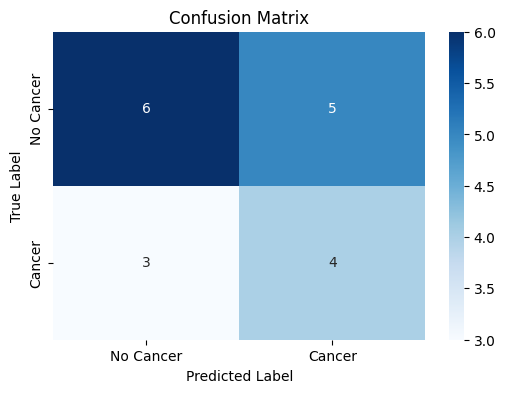

In [9]:
#  Visualization: Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['No Cancer', 'Cancer'], yticklabels=['No Cancer', 'Cancer'])
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()

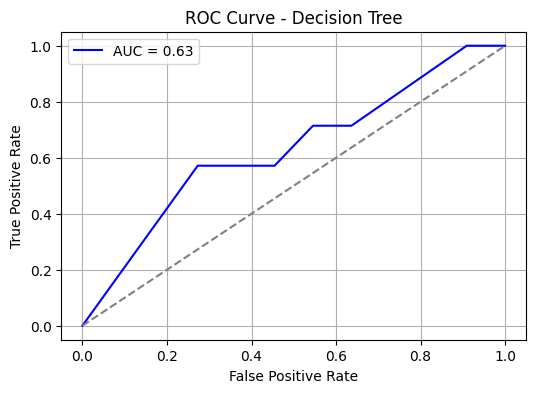

In [11]:
#  Visualization: ROC Curve & AUC
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Decision Tree')
plt.legend()
plt.grid()
plt.show()

In [12]:
# K-Fold Cross-Validation (robustness)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(clf, X, y, cv=cv, scoring='f1')

print(f"K-Fold F1-scores: {scores}")
print(f"F1-score Mean: {scores.mean():.2f}, Std: {scores.std():.2f}")

K-Fold F1-scores: [0.53333333 0.53333333 0.30769231 0.         0.66666667]
F1-score Mean: 0.41, Std: 0.23


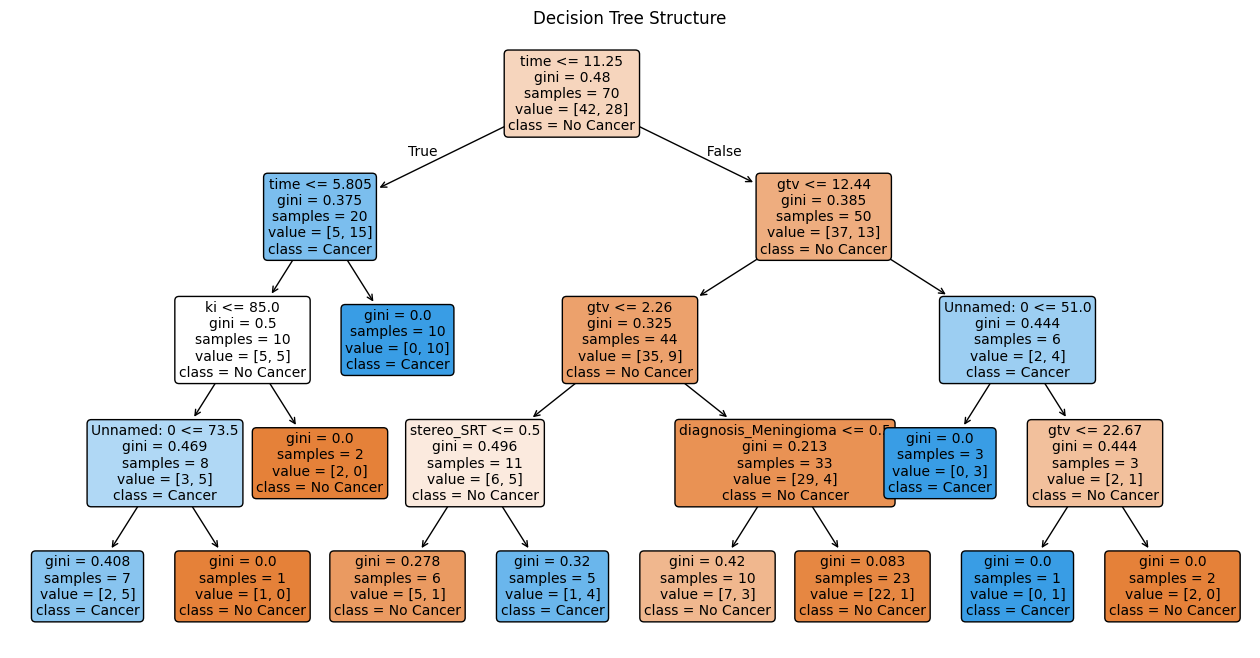

In [13]:
# Visualization: Decision Tree
plt.figure(figsize=(16,8))
plot_tree(clf, feature_names=X.columns, class_names=['No Cancer', 'Cancer'],
          filled=True, rounded=True, fontsize=10)
plt.title('Decision Tree Structure')
plt.show()